In [741]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer

from starter_code import baseline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
en_es = baseline.load_data('en_es.slam.20190204.train')

Loading instances...
Loaded 317049 instances across 100000 exercises...
Loaded 635368 instances across 200000 exercises...
Loaded 951536 instances across 300000 exercises...
Loaded 1271940 instances across 400000 exercises...
Loaded 1591344 instances across 500000 exercises...
Loaded 1911212 instances across 600000 exercises...
Loaded 2227444 instances across 700000 exercises...
Loaded 2546704 instances across 800000 exercises...
Done loading 2622957 instances across 824012 exercises.



In [34]:
en_es[1]

{'DRihrVmh0101': 0.0,
 'DRihrVmh0102': 0.0,
 'DRihrVmh0103': 0.0,
 'DRihrVmh0104': 0.0,
 'TOeLHxLS0101': 0.0,
 'TOeLHxLS0102': 0.0,
 'TOeLHxLS0103': 0.0,
 'TOeLHxLS0104': 0.0,
 'xqtN1I5c0101': 0.0,
 'xqtN1I5c0102': 0.0,
 'xqtN1I5c0103': 0.0,
 'xqtN1I5c0104': 0.0,
 'xqtN1I5c0201': 0.0,
 'xqtN1I5c0202': 0.0,
 'xqtN1I5c0203': 0.0,
 'xqtN1I5c0204': 0.0,
 'xqtN1I5c0301': 0.0,
 'xqtN1I5c0302': 0.0,
 'xqtN1I5c0303': 0.0,
 'xqtN1I5c0304': 0.0,
 'G0pgHMe90101': 0.0,
 'G0pgHMe90102': 0.0,
 'G0pgHMe90103': 0.0,
 'G0pgHMe90104': 0.0,
 'G0pgHMe90201': 0.0,
 'sSLwu6yx0101': 0.0,
 'sSLwu6yx0102': 1.0,
 'sSLwu6yx0103': 0.0,
 'sSLwu6yx0104': 0.0,
 'sSLwu6yx0201': 0.0,
 'sSLwu6yx0202': 0.0,
 'sSLwu6yx0203': 0.0,
 'bRoeMLX+0101': 0.0,
 'bRoeMLX+0201': 0.0,
 'bRoeMLX+0202': 1.0,
 'bRoeMLX+0301': 0.0,
 'bRoeMLX+0302': 0.0,
 'bRoeMLX+0401': 0.0,
 'bRoeMLX+0402': 0.0,
 'bRoeMLX+0403': 0.0,
 'bRoeMLX+0404': 0.0,
 'bRoeMLX+0405': 0.0,
 's+/G8LSd0101': 0.0,
 's+/G8LSd0102': 0.0,
 's+/G8LSd0103': 0.0,
 's+/G8LSd

In [136]:
df_en_es = pd.DataFrame.from_records([vars(s) for s in en_es[0]])
df_en_es['target'] = df_en_es.instance_id.map(en_es[1])
df_en_es.head()

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,morphological_features,part_of_speech,prompt,session,session_id,time,token,token_index,user,target
0,web,[CO],0.003,4,nsubj,DRihrVmh01,1,reverse_translate,DRihrVmh0101,"{'Case': 'Nom', 'Number': 'Sing', 'Person': 1,...",PRON,Yo soy un niño.,lesson,DRihrVmh,9.0,I,1,XEinXf5+,0.0
1,web,[CO],0.003,4,cop,DRihrVmh01,1,reverse_translate,DRihrVmh0102,"{'Mood': 'Ind', 'Number': 'Sing', 'Person': 1,...",VERB,Yo soy un niño.,lesson,DRihrVmh,9.0,am,2,XEinXf5+,0.0
2,web,[CO],0.003,4,det,DRihrVmh01,1,reverse_translate,DRihrVmh0103,"{'Definite': 'Ind', 'PronType': 'Art', 'fPOS':...",DET,Yo soy un niño.,lesson,DRihrVmh,9.0,a,3,XEinXf5+,0.0
3,web,[CO],0.003,0,ROOT,DRihrVmh01,1,reverse_translate,DRihrVmh0104,"{'Number': 'Sing', 'fPOS': 'NOUN++NN'}",NOUN,Yo soy un niño.,lesson,DRihrVmh,9.0,boy,4,XEinXf5+,0.0
4,web,[CO],0.005,4,nsubj,TOeLHxLS01,1,reverse_translate,TOeLHxLS0101,"{'Case': 'Nom', 'Number': 'Sing', 'Person': 1,...",PRON,Yo soy de México.,lesson,TOeLHxLS,12.0,I,1,XEinXf5+,0.0


In [173]:
set(df_en_es.part_of_speech)

{'ADJ',
 'ADP',
 'ADV',
 'AUX',
 'CONJ',
 'DET',
 'INTJ',
 'NOUN',
 'NUM',
 'PART',
 'PRON',
 'PROPN',
 'PUNCT',
 'SCONJ',
 'VERB'}

In [52]:
set(df_en_es.loc[df_en_es.part_of_speech == 'X'].token)

{'five', 'nine', 'twelve'}

In [56]:
df_en_es.loc[(df_en_es.token == 'nine')&(df_en_es.part_of_speech == 'VERB')].head()

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,morphological_features,part_of_speech,prompt,session,session_id,time,token,token_index,user,target
38887,ios,[ES],4.104,4,amod,lrWyqrja05,5,reverse_translate,lrWyqrja0503,"{'Tense': 'Past', 'VerbForm': 'Part', 'fPOS': ...",VERB,Tengo nueve hijos.,practice,lrWyqrja,12.0,nine,3,WpMcFDa7,0.0
77346,ios,[US],0.979,4,amod,sw/+oR6O01,1,listen,sw/+oR6O0103,"{'Tense': 'Past', 'VerbForm': 'Part', 'fPOS': ...",VERB,None,test,sw/+oR6O,20.0,nine,3,YiuWBcdq,1.0
107976,ios,[US],8.618,4,amod,RWWL+vhT02,2,reverse_tap,RWWL+vhT0203,"{'Tense': 'Past', 'VerbForm': 'Part', 'fPOS': ...",VERB,Tengo nueve hijos.,practice,RWWL+vhT,11.0,nine,3,i4XTGTj2,0.0
188555,web,[MX],20.493,4,amod,iRw4EgWH02,2,reverse_translate,iRw4EgWH0203,"{'Tense': 'Past', 'VerbForm': 'Part', 'fPOS': ...",VERB,Tengo nueve hijos.,practice,iRw4EgWH,9.0,nine,3,Zcoe2TAP,0.0
208390,android,[GT],16.015,4,amod,jhiKT17401,1,reverse_translate,jhiKT1740103,"{'Tense': 'Past', 'VerbForm': 'Part', 'fPOS': ...",VERB,Tengo nueve hijos.,practice,jhiKT174,8.0,nine,3,R7f/p7AP,0.0


In [51]:
df_en_es.loc[(df_en_es.dependency_label == 'amod')]

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,morphological_features,part_of_speech,prompt,session,session_id,time,token,token_index,user,target
100,web,[CO],1.766,2,amod,JgxoIako01,1,reverse_translate,JgxoIako0101,"{'Degree': 'Pos', 'fPOS': 'ADJ++JJ'}",ADJ,Buenos días y buenas noches.,lesson,JgxoIako,23.0,Good,1,XEinXf5+,0.0
103,web,[CO],1.766,5,amod,JgxoIako01,1,reverse_translate,JgxoIako0104,"{'Degree': 'Pos', 'fPOS': 'ADJ++JJ'}",ADJ,Buenos días y buenas noches.,lesson,JgxoIako,23.0,good,4,XEinXf5+,0.0
264,web,[CO],2.703,4,amod,yaNGsiBQ05,5,listen,yaNGsiBQ0503,"{'Degree': 'Cmp', 'fPOS': 'ADJ++JJR'}",ADJ,None,practice,yaNGsiBQ,25.0,more,3,XEinXf5+,0.0
317,android,[CO],3.665,2,amod,Qqf76z7Z01,1,reverse_tap,Qqf76z7Z0101,"{'Degree': 'Pos', 'fPOS': 'ADJ++JJ'}",ADJ,Buena pregunta,lesson,Qqf76z7Z,6.0,Good,1,XEinXf5+,0.0
324,android,[CO],3.669,5,amod,wW1i/8KR01,1,reverse_translate,wW1i/8KR0104,"{'Degree': 'Pos', 'fPOS': 'ADJ++JJ'}",ADJ,Yo tengo una buena idea.,lesson,wW1i/8KR,21.0,good,4,XEinXf5+,0.0
329,android,[CO],3.669,5,amod,wW1i/8KR02,2,listen,wW1i/8KR0204,"{'Degree': 'Pos', 'fPOS': 'ADJ++JJ'}",ADJ,None,lesson,wW1i/8KR,15.0,good,4,XEinXf5+,0.0
358,android,[CO],3.682,2,amod,+gSQc0Vy03,3,reverse_tap,+gSQc0Vy0301,"{'Degree': 'Pos', 'fPOS': 'ADJ++JJ'}",ADJ,La próxima semana.,lesson,+gSQc0Vy,7.0,Next,1,XEinXf5+,0.0
515,android,[CO],5.714,3,amod,b/jBh9j102,2,reverse_tap,b/jBh9j10202,"{'Number': 'Plur', 'fPOS': 'NOUN++NNS'}",ADJ,Las niñas escriben.,lesson,b/jBh9j1,5.0,girls,2,XEinXf5+,0.0
629,web,[CO],6.955,5,amod,xeNVdfZO03,3,reverse_translate,xeNVdfZO0304,"{'Degree': 'Pos', 'fPOS': 'ADJ++JJ'}",VERB,El elefante está bebiendo agua.,lesson,xeNVdfZO,18.0,drinking,4,XEinXf5+,0.0
669,web,[CO],7.734,5,amod,li7n/V1m01,1,reverse_translate,li7n/V1m0104,"{'Degree': 'Pos', 'fPOS': 'ADJ++JJ'}",ADJ,Yo tengo una buena idea.,practice,li7n/V1m,12.0,good,4,XEinXf5+,0.0


In [60]:
flat_list = [item for sublist in list(df_en_es.countries) for item in sublist]


2690529

In [61]:
print(len(list(df_en_es.countries)),
len(flat_list))

2622957 2690529


In [66]:
mult_list = []
for item in list(df_en_es.countries):
    if len(item)>1:
        mult_list.append(str(item))
        
set(mult_list)

{"['AR', 'PY']",
 "['AR', 'US']",
 "['AR', 'UY']",
 "['BR', 'CL']",
 "['BR', 'MX']",
 "['CA', 'US']",
 "['CH', 'IT']",
 "['CO', 'CW']",
 "['CO', 'DE', 'FR', 'JP', 'US']",
 "['CO', 'DO']",
 "['CO', 'FR', 'US']",
 "['CO', 'GB', 'NL', 'US']",
 "['CO', 'GB', 'US']",
 "['CO', 'US']",
 "['CR', 'US']",
 "['DE', 'US']",
 "['DO', 'US']",
 "['EC', 'VE']",
 "['ES', 'FR', 'GB']",
 "['ES', 'FR']",
 "['ES', 'GB']",
 "['ES', 'MA']",
 "['ES', 'RO']",
 "['GT', 'US']",
 "['HN', 'SV']",
 "['MA', 'US']",
 "['MX', 'US']",
 "['MX', 'VE']",
 "['PE', 'US']",
 "['PR', 'US']"}

In [72]:
list(df_en_es.morphological_features[0:5])

[{'Case': 'Nom',
  'Number': 'Sing',
  'Person': 1,
  'PronType': 'Prs',
  'fPOS': 'PRON++PRP'},
 {'Mood': 'Ind',
  'Number': 'Sing',
  'Person': 1,
  'Tense': 'Pres',
  'VerbForm': 'Fin',
  'fPOS': 'VERB++VBP'},
 {'Definite': 'Ind', 'PronType': 'Art', 'fPOS': 'DET++DT'},
 {'Number': 'Sing', 'fPOS': 'NOUN++NN'},
 {'Case': 'Nom',
  'Number': 'Sing',
  'Person': 1,
  'PronType': 'Prs',
  'fPOS': 'PRON++PRP'}]

In [93]:
df_en_es.morphological_features[0]['fPOS'].split('++')[1]

'PRP'

In [88]:
# test to see if "fPOS" in all morphological feature dictionaries

morph_keys_test = [list(df_en_es.morphological_features[n].keys()) for n in range(0,100000)]
all('fPOS' in sublist for sublist in morph_keys_test)

True

In [137]:
# new column: fPOS (functional part of speech)

df_en_es['fPOS'] = [df_en_es.morphological_features[n]['fPOS'].split('++')[1] for n in range(0, len(df_en_es))]
df_en_es.to_pickle("with_fPOS.pkl")

In [138]:
df_en_es.head()

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,morphological_features,part_of_speech,prompt,session,session_id,time,token,token_index,user,target,fPOS
0,web,[CO],0.003,4,nsubj,DRihrVmh01,1,reverse_translate,DRihrVmh0101,"{'Case': 'Nom', 'Number': 'Sing', 'Person': 1,...",PRON,Yo soy un niño.,lesson,DRihrVmh,9.0,I,1,XEinXf5+,0.0,PRP
1,web,[CO],0.003,4,cop,DRihrVmh01,1,reverse_translate,DRihrVmh0102,"{'Mood': 'Ind', 'Number': 'Sing', 'Person': 1,...",VERB,Yo soy un niño.,lesson,DRihrVmh,9.0,am,2,XEinXf5+,0.0,VBP
2,web,[CO],0.003,4,det,DRihrVmh01,1,reverse_translate,DRihrVmh0103,"{'Definite': 'Ind', 'PronType': 'Art', 'fPOS':...",DET,Yo soy un niño.,lesson,DRihrVmh,9.0,a,3,XEinXf5+,0.0,DT
3,web,[CO],0.003,0,ROOT,DRihrVmh01,1,reverse_translate,DRihrVmh0104,"{'Number': 'Sing', 'fPOS': 'NOUN++NN'}",NOUN,Yo soy un niño.,lesson,DRihrVmh,9.0,boy,4,XEinXf5+,0.0,NN
4,web,[CO],0.005,4,nsubj,TOeLHxLS01,1,reverse_translate,TOeLHxLS0101,"{'Case': 'Nom', 'Number': 'Sing', 'Person': 1,...",PRON,Yo soy de México.,lesson,TOeLHxLS,12.0,I,1,XEinXf5+,0.0,PRP


In [97]:
set(list(df_en_es.part_of_speech))

{'ADJ',
 'ADP',
 'ADV',
 'AUX',
 'CONJ',
 'DET',
 'INTJ',
 'NOUN',
 'NUM',
 'PART',
 'PRON',
 'PROPN',
 'PUNCT',
 'SCONJ',
 'VERB',
 'X'}

In [100]:
set(list(df_en_es.fPOS))

{'$',
 ',',
 'CC',
 'CD',
 'DT',
 'EX',
 'FW',
 'HYPH',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WRB'}

In [98]:
df_en_es.loc[df_en_es.part_of_speech == 'X']

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,morphological_features,part_of_speech,prompt,session,session_id,time,token,token_index,user,target,fPOS
15111,ios,[ES],5.296,1,conj,PiS6S1hX01,1,reverse_tap,PiS6S1hX0103,"{'Number': 'Sing', 'fPOS': 'PROPN++NNP'}",X,"Tres, seis, nueve",practice,PiS6S1hX,7.0,nine,3,LqH0lp++,0.0,NNP
19714,android,[MX],0.057,1,conj,7Es5Vnp503,3,reverse_tap,7Es5Vnp50303,"{'Number': 'Sing', 'fPOS': 'PROPN++NNP'}",X,"Tres, seis, nueve",test,7Es5Vnp5,9.0,nine,3,eioAQsrN,0.0,NNP
46082,android,[AR],3.123,1,conj,mg0naoDc01,1,listen,mg0naoDc0103,"{'VerbForm': 'Inf', 'fPOS': 'VERB++VB'}",X,None,lesson,mg0naoDc,16.0,five,3,uZXghjhJ,0.0,VB
76626,android,[VE],0.305,1,conj,H5+2BrUG05,5,reverse_translate,H5+2BrUG0503,"{'Number': 'Sing', 'fPOS': 'PROPN++NNP'}",X,"Tres, seis, nueve",lesson,H5+2BrUG,NaN,nine,3,KF9RznZj,0.0,NNP
77463,ios,[US],2.089,1,conj,Vqm5q81y03,3,reverse_tap,Vqm5q81y0303,"{'Number': 'Sing', 'fPOS': 'PROPN++NNP'}",X,"Tres, seis, nueve",test,Vqm5q81y,10.0,nine,3,YiuWBcdq,1.0,NNP
77890,ios,[US],8.099,1,conj,ej9njd1H02,2,reverse_tap,ej9njd1H0203,"{'Number': 'Sing', 'fPOS': 'PROPN++NNP'}",X,"Tres, seis, nueve",practice,ej9njd1H,7.0,nine,3,YiuWBcdq,0.0,NNP
86577,web,[MX],4.144,1,conj,8sprxkoM07,7,reverse_translate,8sprxkoM0703,"{'Number': 'Sing', 'fPOS': 'PROPN++NNP'}",X,"Tres, seis, nueve",practice,8sprxkoM,2.0,nine,3,hEFKw4yv,1.0,NNP
89393,android,[ES],4.841,1,conj,IXapwJqA01,1,listen,IXapwJqA0103,"{'VerbForm': 'Inf', 'fPOS': 'VERB++VB'}",X,None,lesson,IXapwJqA,12.0,five,3,/3lvD53E,0.0,VB
94354,ios,[ES],8.984,1,conj,bAuqtXj501,1,reverse_tap,bAuqtXj50103,"{'Number': 'Sing', 'fPOS': 'PROPN++NNP'}",X,"Tres, seis, nueve",practice,bAuqtXj5,6.0,nine,3,ROBcVJ9J,0.0,NNP
101876,android,[MX],19.375,1,conj,iPuZRYu401,1,listen,iPuZRYu40103,"{'VerbForm': 'Inf', 'fPOS': 'VERB++VB'}",X,None,lesson,iPuZRYu4,15.0,five,3,tv3yU/lX,0.0,VB


In [140]:
set(list(df_en_es.loc[df_en_es.part_of_speech == 'X'].token))

{'five', 'nine', 'twelve'}

In [141]:
# since all the instances where the part_of_speech is 'x' are numbers, I'm relabeling them as 'NUM'
df_en_es.loc[(df_en_es.part_of_speech == 'X'), 'part_of_speech'] = 'NUM'

In [142]:
df_en_es.loc[df_en_es.part_of_speech == 'X']

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,morphological_features,part_of_speech,prompt,session,session_id,time,token,token_index,user,target,fPOS


In [145]:
df_en_es.loc[df_en_es.time <=0].shape

(287, 20)

In [180]:
df_en_es = df_en_es.loc[(df_en_es.time > 0)&(df_en_es.time < 60)]
df_en_es.to_pickle("times_trimmed.pkl")
df_en_es.shape

(2470315, 20)

In [150]:
np.max(df_en_es.loc[(df_en_es.time > 0), 'time'])

330554.0

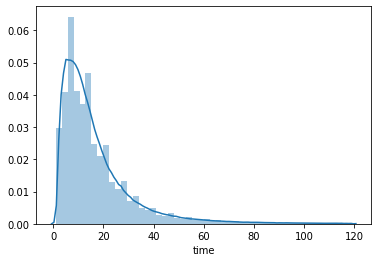

In [160]:
sns.distplot(df_en_es.loc[(df_en_es.time > 0)&(df_en_es.time < 120)].time)

In [168]:
time_exp = df_en_es.copy()

In [171]:
np.mean(time_exp.loc[(time_exp.time < 90)& (time_exp.time > 0), 'time'])
# sns.distplot(time_exp.loc[(time_exp.time > 0)].time)

16.22144183732264

In [183]:
# official language is english list
country_codes_df = pd.read_csv('country_codes.csv')
country_codes_df.head()

,Code,Country name (using title case),Year,ccTLD,ISO 3166-2,Notes
0,AD,Andorra,1974,.ad,ISO 3166-2:AD,NaN
1,AE,United Arab Emirates,1974,.ae,ISO 3166-2:AE,NaN
2,AF,Afghanistan,1974,.af,ISO 3166-2:AF,NaN
3,AG,Antigua and Barbuda,1974,.ag,ISO 3166-2:AG,NaN
4,AI,Anguilla,1985,.ai,ISO 3166-2:AI,AI previously represented French Afars and Issas


In [194]:
country_code_dict = dict(zip(country_codes_df['Country name (using title case)'], country_codes_df['Code']))

country_code_dict['Namibia'] = 'NA'

country_code_dict

{'Andorra': 'AD',
 'United Arab Emirates': 'AE',
 'Afghanistan': 'AF',
 'Antigua and Barbuda': 'AG',
 'Anguilla': 'AI',
 'Albania': 'AL',
 'Armenia': 'AM',
 'Angola': 'AO',
 'Antarctica': 'AQ',
 'Argentina': 'AR',
 'American Samoa': 'AS',
 'Austria': 'AT',
 'Australia': 'AU',
 'Aruba': 'AW',
 'Åland Islands': 'AX',
 'Azerbaijan': 'AZ',
 'Bosnia and Herzegovina': 'BA',
 'Barbados': 'BB',
 'Bangladesh': 'BD',
 'Belgium': 'BE',
 'Burkina Faso': 'BF',
 'Bulgaria': 'BG',
 'Bahrain': 'BH',
 'Burundi': 'BI',
 'Benin': 'BJ',
 'Saint Barthélemy': 'BL',
 'Bermuda': 'BM',
 'Brunei Darussalam': 'BN',
 'Bolivia (Plurinational State of)': 'BO',
 'Bonaire, Sint Eustatius and Saba': 'BQ',
 'Brazil': 'BR',
 'Bahamas': 'BS',
 'Bhutan': 'BT',
 'Bouvet Island': 'BV',
 'Botswana': 'BW',
 'Belarus': 'BY',
 'Belize': 'BZ',
 'Canada': 'CA',
 'Cocos (Keeling) Islands': 'CC',
 'Congo, Democratic Republic of the': 'CD',
 'Central African Republic': 'CF',
 'Congo': 'CG',
 'Switzerland': 'CH',
 "Côte d'Ivoire": 'C

In [216]:
eng_speaking_df = pd.read_csv('english.csv')
country_list = list(eng_speaking_df.Country)
eng_speaking_countries = [item.split('[')[0] for item in country_list]
eng_speaking_countries = ['United States of America' if x=='United States' else x for x in eng_speaking_countries]
eng_speaking_countries = [item.split('14')[0] for item in eng_speaking_countries]
eng_speaking_countries = ['Gambia' if x=='The Gambia' else x for x in eng_speaking_countries]
eng_speaking_countries = ['Micronesia (Federated States of)' if x=='Federated States of Micronesia' else x for x in eng_speaking_countries]
eng_speaking_countries = ['Somalia' if x=='Somaliland' else x for x in eng_speaking_countries]
eng_speaking_countries = ['Tanzania, United Republic of' if x=='Tanzania' else x for x in eng_speaking_countries]

eng_speaking_countries

['Australia',
 'New Zealand',
 'United Kingdom',
 'United States of America',
 'Antigua and Barbuda',
 'Bahamas',
 'Barbados',
 'Belize',
 'Botswana',
 'Burundi',
 'Cameroon',
 'Canada',
 'Cook Islands',
 'Dominica',
 'Eswatini',
 'Fiji',
 'Gambia',
 'Ghana',
 'Grenada',
 'Guyana',
 'India',
 'Ireland',
 'Jamaica',
 'Kenya',
 'Kiribati',
 'Lesotho',
 'Liberia',
 'Malawi',
 'Malta',
 'Marshall Islands',
 'Mauritius',
 'Micronesia (Federated States of)',
 'Namibia',
 'Nauru',
 'Nigeria',
 'Niue',
 'Pakistan',
 'Palau',
 'Papua New Guinea',
 'Philippines',
 'Rwanda',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'Seychelles',
 'Sierra Leone',
 'Singapore',
 'Solomon Islands',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Sudan',
 'Tanzania, United Republic of',
 'Tonga',
 'Trinidad and Tobago',
 'Tuvalu',
 'Uganda',
 'Vanuatu',
 'Zambia',
 'Zimbabwe']

In [217]:
eng_speaking_codes = []
for item in eng_speaking_countries:
    eng_speaking_codes.append(country_code_dict[item])
    
eng_speaking_codes

['AU',
 'NZ',
 'UK',
 'US',
 'AG',
 'BS',
 'BB',
 'BZ',
 'BW',
 'BI',
 'CM',
 'CA',
 'CK',
 'DM',
 'SZ',
 'FJ',
 'GM',
 'GH',
 'GD',
 'GY',
 'IN',
 'IE',
 'JM',
 'KE',
 'KI',
 'LS',
 'LR',
 'MW',
 'MT',
 'MH',
 'MU',
 'FM',
 'NA',
 'NR',
 'NG',
 'NU',
 'PK',
 'PW',
 'PG',
 'PH',
 'RW',
 'KN',
 'LC',
 'VC',
 'WS',
 'SC',
 'SL',
 'SG',
 'SB',
 'SO',
 'ZA',
 'SS',
 'SD',
 'TZ',
 'TO',
 'TT',
 'TV',
 'UG',
 'VU',
 'ZM',
 'ZW']

In [229]:
# make a new column "english" that is a binary feature 
# '0' if the country the user has used duolingo in does not have english as a de facto or de jure language
# '1' if one of the countries the user has used duolingo in does have english as a de facto or de jure language

eng_is_lang = []

for l in list(df_en_es.countries):
    if any(elem in l for elem in eng_speaking_codes):
        eng_is_lang.append(1)
    else:
        eng_is_lang.append(0)
        
df_en_es['english'] = eng_is_lang

In [237]:
df_en_es.loc[df_en_es.instance_id == 'TOeLHxLS0103'].part_of_speech

6    ADP
Name: part_of_speech, dtype: object

In [231]:
df_en_es.to_pickle("english_speaking_country.pkl")

In [290]:
list(df_en_es.morphological_features[10000:10040])

[{'Number': 'Sing', 'fPOS': 'PROPN++NNP'},
 {'Mood': 'Ind',
  'Number': 'Sing',
  'Person': 3,
  'Tense': 'Past',
  'VerbForm': 'Fin',
  'fPOS': 'VERB++VBD'},
 {'Number': 'Plur', 'fPOS': 'NOUN++NNS'},
 {'fPOS': 'ADP++IN'},
 {'Case': 'Acc', 'Person': 2, 'PronType': 'Prs', 'fPOS': 'PRON++PRP'},
 {'fPOS': 'ADP++IN'},
 {'Number': 'Sing', 'fPOS': 'NOUN++NN'},
 {'PronType': 'Int', 'fPOS': 'ADV++WRB'},
 {'fPOS': 'PART++RB'},
 {'PronType': 'Int', 'fPOS': 'ADV++WRB'},
 {'Case': 'Acc',
  'Number': 'Sing',
  'Person': 1,
  'PronType': 'Prs',
  'fPOS': 'PRON++PRP'},
 {'PronType': 'Int', 'fPOS': 'PRON++WP'},
 {'Mood': 'Ind',
  'Number': 'Sing',
  'Person': 3,
  'Tense': 'Pres',
  'VerbForm': 'Fin',
  'fPOS': 'VERB++VBZ'},
 {'Degree': 'Pos', 'fPOS': 'ADJ++JJ'},
 {'Mood': 'Ind', 'Tense': 'Pres', 'VerbForm': 'Fin', 'fPOS': 'AUX++VBP'},
 {'Case': 'Nom', 'Person': 2, 'PronType': 'Prs', 'fPOS': 'PRON++PRP'},
 {'VerbForm': 'Inf', 'fPOS': 'VERB++VB'},
 {'Number': 'Plur', 'fPOS': 'NOUN++NNS'},
 {'PronType':

In [267]:
df_en_es.iloc[15:20]

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,morphological_features,...,prompt,session,session_id,time,token,token_index,user,target,fPOS,english
15,web,[CO],0.008,0,ROOT,xqtN1I5c02,2,reverse_translate,xqtN1I5c0204,"{'Number': 'Sing', 'fPOS': 'NOUN++NN'}",...,Ella es una niña.,lesson,xqtN1I5c,13.0,girl,4,XEinXf5+,0.0,NN,0
16,web,[CO],0.008,4,cop,xqtN1I5c03,3,reverse_translate,xqtN1I5c0301,"{'Mood': 'Ind', 'Number': 'Sing', 'Person': 3,...",...,¿Él es un niño?,lesson,xqtN1I5c,16.0,Is,1,XEinXf5+,0.0,VBZ,0
17,web,[CO],0.008,4,nsubj,xqtN1I5c03,3,reverse_translate,xqtN1I5c0302,"{'Case': 'Nom', 'Gender': 'Masc', 'Number': 'S...",...,¿Él es un niño?,lesson,xqtN1I5c,16.0,he,2,XEinXf5+,0.0,PRP,0
18,web,[CO],0.008,4,det,xqtN1I5c03,3,reverse_translate,xqtN1I5c0303,"{'Definite': 'Ind', 'PronType': 'Art', 'fPOS':...",...,¿Él es un niño?,lesson,xqtN1I5c,16.0,a,3,XEinXf5+,0.0,DT,0
19,web,[CO],0.008,0,ROOT,xqtN1I5c03,3,reverse_translate,xqtN1I5c0304,"{'Number': 'Sing', 'fPOS': 'NOUN++NN'}",...,¿Él es un niño?,lesson,xqtN1I5c,16.0,boy,4,XEinXf5+,0.0,NN,0


In [298]:
features = []
for item in list(df_en_es.morphological_features[100000:200000]):
    for word in list(item.keys()):
        if word not in features:
            features.append(word)
    
features

['Mood',
 'Number',
 'Person',
 'Tense',
 'VerbForm',
 'fPOS',
 'Degree',
 'Case',
 'PronType',
 'Definite',
 'NumType',
 'Poss',
 'Gender',
 'Voice']

In [328]:
# Making the value denoting indefinite articles distinct for the value denoting a verb is in the indicative mood

for item in list(df_en_es.morphological_features):
    item.update((k, "Indef") for k, v in item.items() if k == "Definite" and v == "Ind")


In [329]:
# making the value denoting something is possessive actually descriptive instead of "yes"

for item in list(df_en_es.morphological_features):
    item.update((k, "Possess") for k, v in item.items() if k == "Poss" and v == "Yes")


In [360]:
df_en_es.morphological_features[:11]

0                        [Nom, Sing, 1, Prs, PRON++PRP]
1                  [Ind, Sing, 1, Pres, Fin, VERB++VBP]
2                                 [Indef, Art, DET++DT]
3                                      [Sing, NOUN++NN]
4                        [Nom, Sing, 1, Prs, PRON++PRP]
5                  [Ind, Sing, 1, Pres, Fin, VERB++VBP]
6                                             [ADP++IN]
7                                    [Sing, PROPN++NNP]
8                   [Sing, 1, Possess, Prs, PRON++PRP$]
9                                      [Sing, NOUN++NN]
10    {'Mood': 'Ind', 'Number': 'Sing', 'Person': 3,...
Name: morphological_features, dtype: object

In [374]:
exp_dummy = df_en_es.copy()
exp_dummy = exp_dummy[:10]

In [367]:
df_en_es.morphological_features[10] = list(df_en_es.morphological_features[10].values())

# = [list(d.values()) for d in df_en_es.morphological_features[10]]
df_en_es.morphological_features[:20]

0           [Nom, Sing, 1, Prs, PRON++PRP]
1     [Ind, Sing, 1, Pres, Fin, VERB++VBP]
2                    [Indef, Art, DET++DT]
3                         [Sing, NOUN++NN]
4           [Nom, Sing, 1, Prs, PRON++PRP]
5     [Ind, Sing, 1, Pres, Fin, VERB++VBP]
6                                [ADP++IN]
7                       [Sing, PROPN++NNP]
8      [Sing, 1, Possess, Prs, PRON++PRP$]
9                         [Sing, NOUN++NN]
10    [Ind, Sing, 3, Pres, Fin, VERB++VBZ]
11                      [Sing, PROPN++NNP]
12                      [Sing, PROPN++NNP]
13    [Ind, Sing, 3, Pres, Fin, VERB++VBZ]
14                   [Indef, Art, DET++DT]
15                        [Sing, NOUN++NN]
16    [Ind, Sing, 3, Pres, Fin, VERB++VBZ]
17    [Nom, Masc, Sing, 3, Prs, PRON++PRP]
18                   [Indef, Art, DET++DT]
19                        [Sing, NOUN++NN]
Name: morphological_features, dtype: object

In [372]:
for feature_list in df_en_es.morphological_features[10:]:
    feature_list.pop()
    
df_en_es.morphological_features[:20]

0           [Nom, Sing, 1, Prs]
1     [Ind, Sing, 1, Pres, Fin]
2                  [Indef, Art]
3                        [Sing]
4           [Nom, Sing, 1, Prs]
5     [Ind, Sing, 1, Pres, Fin]
6                            []
7                        [Sing]
8       [Sing, 1, Possess, Prs]
9                        [Sing]
10    [Ind, Sing, 3, Pres, Fin]
11                       [Sing]
12                       [Sing]
13    [Ind, Sing, 3, Pres, Fin]
14                 [Indef, Art]
15                       [Sing]
16    [Ind, Sing, 3, Pres, Fin]
17    [Nom, Masc, Sing, 3, Prs]
18                 [Indef, Art]
19                       [Sing]
Name: morphological_features, dtype: object

In [373]:
df_en_es.to_pickle("morph_list_of_lists.pkl")

In [411]:
# 'person' features were integers, therefore they're being converted to strings
df_en_es.morphological_features = [[str(item) for item in group] for group in list(df_en_es.morphological_features)]

# turning morphological features into dummy vairables using the multi label binarizer
s = df_en_es['morphological_features']

mlb = MultiLabelBinarizer()

dummy = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df_en_es.index)

df_en_es = pd.concat([df_en_es, dummy], axis = 1)

df_en_es.to_pickle("morph_features_dummy_vars.pkl")

In [417]:
# since yes was only for possessives, making the values that had "yes" equal to 1 as possessive to 1
df_en_es.loc[df_en_es.Yes==1, 'Possess'] = 1

In [421]:
# drop yes column now that yes values have transferred over to the possessive column
df_en_es.drop(columns=['Yes'], inplace=True)

In [430]:
# now that we've made these all into dummy variables, we can drop this column
df_en_es.drop(columns=['morphological_features'], inplace=True)

In [422]:
df_en_es.columns

Index(['client', 'countries', 'days', 'dependency_edge_head',
       'dependency_label', 'exercise_id', 'exercise_index', 'format',
       'instance_id', 'morphological_features', 'part_of_speech', 'prompt',
       'session', 'session_id', 'time', 'token', 'token_index', 'user',
       'target', 'fPOS', 'english', '1', '2', '3', 'Acc', 'Art', 'Card', 'Cmp',
       'Def', 'Dem', 'Fem', 'Fin', 'Ger', 'Imp', 'Ind', 'Indef', 'Inf', 'Int',
       'Masc', 'Mult', 'Neut', 'Nom', 'Ord', 'Part', 'Pass', 'Past', 'Plur',
       'Pos', 'Possess', 'Pres', 'Prs', 'Rel', 'Sing', 'Sup'],
      dtype='object')

In [425]:
# since instance id will be different for every observation, this is where we would see duplicates
# since this function returned 0, we can conclude that there are no duplicate values in this dataframe
list(df_en_es.duplicated('instance_id')).count(True)

0

In [436]:
df_en_es.iloc[:,:20].head(10)

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,part_of_speech,prompt,session,session_id,time,token,token_index,user,target,fPOS,english
0,web,[CO],0.003,4,nsubj,DRihrVmh01,1,reverse_translate,DRihrVmh0101,PRON,Yo soy un niño.,lesson,DRihrVmh,9.0,I,1,XEinXf5+,0.0,PRP,0
1,web,[CO],0.003,4,cop,DRihrVmh01,1,reverse_translate,DRihrVmh0102,VERB,Yo soy un niño.,lesson,DRihrVmh,9.0,am,2,XEinXf5+,0.0,VBP,0
2,web,[CO],0.003,4,det,DRihrVmh01,1,reverse_translate,DRihrVmh0103,DET,Yo soy un niño.,lesson,DRihrVmh,9.0,a,3,XEinXf5+,0.0,DT,0
3,web,[CO],0.003,0,ROOT,DRihrVmh01,1,reverse_translate,DRihrVmh0104,NOUN,Yo soy un niño.,lesson,DRihrVmh,9.0,boy,4,XEinXf5+,0.0,NN,0
4,web,[CO],0.005,4,nsubj,TOeLHxLS01,1,reverse_translate,TOeLHxLS0101,PRON,Yo soy de México.,lesson,TOeLHxLS,12.0,I,1,XEinXf5+,0.0,PRP,0
5,web,[CO],0.005,4,cop,TOeLHxLS01,1,reverse_translate,TOeLHxLS0102,VERB,Yo soy de México.,lesson,TOeLHxLS,12.0,am,2,XEinXf5+,0.0,VBP,0
6,web,[CO],0.005,4,case,TOeLHxLS01,1,reverse_translate,TOeLHxLS0103,ADP,Yo soy de México.,lesson,TOeLHxLS,12.0,from,3,XEinXf5+,0.0,IN,0
7,web,[CO],0.005,0,ROOT,TOeLHxLS01,1,reverse_translate,TOeLHxLS0104,PROPN,Yo soy de México.,lesson,TOeLHxLS,12.0,Mexico,4,XEinXf5+,0.0,NNP,0
8,web,[CO],0.008,2,nmod:poss,xqtN1I5c01,1,reverse_translate,xqtN1I5c0101,PRON,Mi nombre es Pedro.,lesson,xqtN1I5c,6.0,My,1,XEinXf5+,0.0,PRP$,0
9,web,[CO],0.008,4,nsubj,xqtN1I5c01,1,reverse_translate,xqtN1I5c0102,NOUN,Mi nombre es Pedro.,lesson,xqtN1I5c,6.0,name,2,XEinXf5+,0.0,NN,0


In [437]:
# dummy variables for part of speech

dummy = pd.get_dummies(df_en_es.part_of_speech)

df_en_es = pd.concat([df_en_es, dummy], axis = 1)
df_en_es.head(10)

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,part_of_speech,...,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,VERB
0,web,[CO],0.003,4,nsubj,DRihrVmh01,1,reverse_translate,DRihrVmh0101,PRON,...,0,0,0,0,0,1,0,0,0,0
1,web,[CO],0.003,4,cop,DRihrVmh01,1,reverse_translate,DRihrVmh0102,VERB,...,0,0,0,0,0,0,0,0,0,1
2,web,[CO],0.003,4,det,DRihrVmh01,1,reverse_translate,DRihrVmh0103,DET,...,1,0,0,0,0,0,0,0,0,0
3,web,[CO],0.003,0,ROOT,DRihrVmh01,1,reverse_translate,DRihrVmh0104,NOUN,...,0,0,1,0,0,0,0,0,0,0
4,web,[CO],0.005,4,nsubj,TOeLHxLS01,1,reverse_translate,TOeLHxLS0101,PRON,...,0,0,0,0,0,1,0,0,0,0
5,web,[CO],0.005,4,cop,TOeLHxLS01,1,reverse_translate,TOeLHxLS0102,VERB,...,0,0,0,0,0,0,0,0,0,1
6,web,[CO],0.005,4,case,TOeLHxLS01,1,reverse_translate,TOeLHxLS0103,ADP,...,0,0,0,0,0,0,0,0,0,0
7,web,[CO],0.005,0,ROOT,TOeLHxLS01,1,reverse_translate,TOeLHxLS0104,PROPN,...,0,0,0,0,0,0,1,0,0,0
8,web,[CO],0.008,2,nmod:poss,xqtN1I5c01,1,reverse_translate,xqtN1I5c0101,PRON,...,0,0,0,0,0,1,0,0,0,0
9,web,[CO],0.008,4,nsubj,xqtN1I5c01,1,reverse_translate,xqtN1I5c0102,NOUN,...,0,0,1,0,0,0,0,0,0,0


In [438]:
# now that we've made these all into dummy variables, we can drop this column
df_en_es.drop(columns=['part_of_speech'], inplace=True)

In [440]:
df_en_es.PUNCT.value_counts()

0    2470296
1         19
Name: PUNCT, dtype: int64

In [441]:
df_en_es = df_en_es.loc[df_en_es.PUNCT == 0]
df_en_es.drop(columns=['PUNCT'], inplace=True)

In [442]:
df_en_es.columns

Index(['client', 'countries', 'days', 'dependency_edge_head',
       'dependency_label', 'exercise_id', 'exercise_index', 'format',
       'instance_id', 'prompt', 'session', 'session_id', 'time', 'token',
       'token_index', 'user', 'target', 'fPOS', 'english', '1', '2', '3',
       'Acc', 'Art', 'Card', 'Cmp', 'Def', 'Dem', 'Fem', 'Fin', 'Ger', 'Imp',
       'Ind', 'Indef', 'Inf', 'Int', 'Masc', 'Mult', 'Neut', 'Nom', 'Ord',
       'Part', 'Pass', 'Past', 'Plur', 'Pos', 'Possess', 'Pres', 'Prs', 'Rel',
       'Sing', 'Sup', 'ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'DET', 'INTJ',
       'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'SCONJ', 'VERB'],
      dtype='object')

In [458]:
df_en_es.loc[df_en_es.user == 'XEinXf5+']

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,prompt,...,CONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,SCONJ,VERB
0,web,[CO],0.003,4,nsubj,DRihrVmh01,1,reverse_translate,DRihrVmh0101,Yo soy un niño.,...,0,0,0,0,0,0,1,0,0,0
1,web,[CO],0.003,4,cop,DRihrVmh01,1,reverse_translate,DRihrVmh0102,Yo soy un niño.,...,0,0,0,0,0,0,0,0,0,1
2,web,[CO],0.003,4,det,DRihrVmh01,1,reverse_translate,DRihrVmh0103,Yo soy un niño.,...,0,1,0,0,0,0,0,0,0,0
3,web,[CO],0.003,0,ROOT,DRihrVmh01,1,reverse_translate,DRihrVmh0104,Yo soy un niño.,...,0,0,0,1,0,0,0,0,0,0
4,web,[CO],0.005,4,nsubj,TOeLHxLS01,1,reverse_translate,TOeLHxLS0101,Yo soy de México.,...,0,0,0,0,0,0,1,0,0,0
5,web,[CO],0.005,4,cop,TOeLHxLS01,1,reverse_translate,TOeLHxLS0102,Yo soy de México.,...,0,0,0,0,0,0,0,0,0,1
6,web,[CO],0.005,4,case,TOeLHxLS01,1,reverse_translate,TOeLHxLS0103,Yo soy de México.,...,0,0,0,0,0,0,0,0,0,0
7,web,[CO],0.005,0,ROOT,TOeLHxLS01,1,reverse_translate,TOeLHxLS0104,Yo soy de México.,...,0,0,0,0,0,0,0,1,0,0
8,web,[CO],0.008,2,nmod:poss,xqtN1I5c01,1,reverse_translate,xqtN1I5c0101,Mi nombre es Pedro.,...,0,0,0,0,0,0,1,0,0,0
9,web,[CO],0.008,4,nsubj,xqtN1I5c01,1,reverse_translate,xqtN1I5c0102,Mi nombre es Pedro.,...,0,0,0,1,0,0,0,0,0,0


In [465]:
sort_exp = df_en_es.copy()
sort_exp = sort_exp[1270:1300]

In [518]:
dummy_cols = list(sort_exp.sort_values(['user', 'days', 'exercise_index']).iloc[:,19:].columns)

sort_exp = sort_exp.sort_values(['user', 'days', 'exercise_index'])

In [500]:
list(set(sort_exp.user))

['XEinXf5+', 'lTIfCaa+']

In [519]:
no_noun_dummy_cols = dummy_cols.copy()
no_noun_dummy_cols.remove("NOUN")

In [530]:
df_en_es.columns

Index(['client', 'countries', 'days', 'dependency_edge_head',
       'dependency_label', 'exercise_id', 'exercise_index', 'format',
       'instance_id', 'prompt', 'session', 'session_id', 'time', 'token',
       'token_index', 'user', 'target', 'fPOS', 'english', '1', '2', '3',
       'Acc', 'Art', 'Card', 'Cmp', 'Def', 'Dem', 'Fem', 'Fin', 'Ger', 'Imp',
       'Ind', 'Indef', 'Inf', 'Int', 'Masc', 'Mult', 'Neut', 'Nom', 'Ord',
       'Part', 'Pass', 'Past', 'Plur', 'Pos', 'Possess', 'Pres', 'Prs', 'Rel',
       'Sing', 'Sup', 'ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'DET', 'INTJ',
       'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'SCONJ', 'VERB'],
      dtype='object')

In [533]:
df_en_es = df_en_es.sort_values(['user', 'days', 'exercise_index'])
df_en_es.iloc[:,:19]

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,prompt,session,session_id,time,token,token_index,user,target,fPOS,english
2118170,web,[MX],0.004,0,ROOT,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0101,¿Soy yo un niño?,lesson,4Vd4ID0q,30.0,Am,1,++j955YG,0.0,$,0
2118171,web,[MX],0.004,1,iobj,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0102,¿Soy yo un niño?,lesson,4Vd4ID0q,30.0,I,2,++j955YG,1.0,PRP,0
2118172,web,[MX],0.004,4,det,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0103,¿Soy yo un niño?,lesson,4Vd4ID0q,30.0,a,3,++j955YG,0.0,DT,0
2118173,web,[MX],0.004,1,dobj,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0104,¿Soy yo un niño?,lesson,4Vd4ID0q,30.0,boy,4,++j955YG,0.0,NN,0
2118174,web,[MX],1.059,4,nsubj,bS27SmJx01,1,reverse_translate,bS27SmJx0101,Yo soy de México.,lesson,bS27SmJx,14.0,I,1,++j955YG,0.0,PRP,0
2118175,web,[MX],1.059,4,cop,bS27SmJx01,1,reverse_translate,bS27SmJx0102,Yo soy de México.,lesson,bS27SmJx,14.0,am,2,++j955YG,0.0,VBP,0
2118176,web,[MX],1.059,4,case,bS27SmJx01,1,reverse_translate,bS27SmJx0103,Yo soy de México.,lesson,bS27SmJx,14.0,from,3,++j955YG,0.0,IN,0
2118177,web,[MX],1.059,0,ROOT,bS27SmJx01,1,reverse_translate,bS27SmJx0104,Yo soy de México.,lesson,bS27SmJx,14.0,Mexico,4,++j955YG,0.0,NNP,0
2118182,web,[MX],1.059,4,nsubj,bS27SmJx03,3,reverse_translate,bS27SmJx0301,Yo soy de España.,lesson,bS27SmJx,9.0,I,1,++j955YG,0.0,PRP,0
2118183,web,[MX],1.059,4,cop,bS27SmJx03,3,reverse_translate,bS27SmJx0302,Yo soy de España.,lesson,bS27SmJx,9.0,am,2,++j955YG,1.0,VBP,0


In [536]:
dum_cols = df_en_es.iloc[:,19:].columns
users = list(set(df_en_es.user))
df_en_es = df_en_es.sort_values(['user', 'days', 'exercise_index'])
len(users)

2585

In [558]:
list(np.array_split(users,1292)[0])

['hQt9q/cX', 'LVgZf3vq', 'MH5+AQ5+']

In [555]:
users_test = list(np.array_split(users,1292)[0])

for user in users_test:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))
df_en_es.head(20) 

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,prompt,...,CONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,SCONJ,VERB
2118170,web,[MX],0.004,0,ROOT,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0101,¿Soy yo un niño?,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118171,web,[MX],0.004,1,iobj,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0102,¿Soy yo un niño?,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2118172,web,[MX],0.004,4,det,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0103,¿Soy yo un niño?,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118173,web,[MX],0.004,1,dobj,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0104,¿Soy yo un niño?,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2118174,web,[MX],1.059,4,nsubj,bS27SmJx01,1,reverse_translate,bS27SmJx0101,Yo soy de México.,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2118175,web,[MX],1.059,4,cop,bS27SmJx01,1,reverse_translate,bS27SmJx0102,Yo soy de México.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2118176,web,[MX],1.059,4,case,bS27SmJx01,1,reverse_translate,bS27SmJx0103,Yo soy de México.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118177,web,[MX],1.059,0,ROOT,bS27SmJx01,1,reverse_translate,bS27SmJx0104,Yo soy de México.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2118182,web,[MX],1.059,4,nsubj,bS27SmJx03,3,reverse_translate,bS27SmJx0301,Yo soy de España.,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2118183,web,[MX],1.059,4,cop,bS27SmJx03,3,reverse_translate,bS27SmJx0302,Yo soy de España.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [560]:
# how many times user has encountered the specific feature (if this is their first or fifth time encountering a noun, determiner, etc)
# to actually run on the volume of data present, the operation is performed on sections of the data divided by user

users_1 = list(np.array_split(users,100)[0])

for user in users_1:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,prompt,...,CONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,SCONJ,VERB
2118170,web,[MX],0.004,0,ROOT,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0101,¿Soy yo un niño?,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118171,web,[MX],0.004,1,iobj,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0102,¿Soy yo un niño?,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2118172,web,[MX],0.004,4,det,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0103,¿Soy yo un niño?,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118173,web,[MX],0.004,1,dobj,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0104,¿Soy yo un niño?,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2118174,web,[MX],1.059,4,nsubj,bS27SmJx01,1,reverse_translate,bS27SmJx0101,Yo soy de México.,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2118175,web,[MX],1.059,4,cop,bS27SmJx01,1,reverse_translate,bS27SmJx0102,Yo soy de México.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2118176,web,[MX],1.059,4,case,bS27SmJx01,1,reverse_translate,bS27SmJx0103,Yo soy de México.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118177,web,[MX],1.059,0,ROOT,bS27SmJx01,1,reverse_translate,bS27SmJx0104,Yo soy de México.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2118182,web,[MX],1.059,4,nsubj,bS27SmJx03,3,reverse_translate,bS27SmJx0301,Yo soy de España.,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2118183,web,[MX],1.059,4,cop,bS27SmJx03,3,reverse_translate,bS27SmJx0302,Yo soy de España.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [561]:
users_2 = list(np.array_split(users,100)[1])

for user in users_2:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))
 

In [562]:
users_3 = list(np.array_split(users,100)[2])

for user in users_3:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))


In [563]:
users_4 = list(np.array_split(users,100)[3])

for user in users_4:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))


In [564]:
users_5 = list(np.array_split(users,100)[4])

for user in users_5:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))


In [565]:
users_6 = list(np.array_split(users,100)[5])

for user in users_6:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [566]:
users_7 = list(np.array_split(users,100)[6])

for user in users_7:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [567]:
users_8 = list(np.array_split(users,100)[7])

for user in users_8:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [568]:
users_9 = list(np.array_split(users,100)[8])

for user in users_9:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [569]:
users_10 = list(np.array_split(users,100)[9])

for user in users_10:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [570]:
users_11 = list(np.array_split(users,100)[10])

for user in users_11:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [571]:
users_12 = list(np.array_split(users,100)[11])

for user in users_12:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [572]:
users_13 = list(np.array_split(users,100)[12])

for user in users_13:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [575]:
users_14 = list(np.array_split(users,100)[13])

for user in users_14:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [576]:
users_15 = list(np.array_split(users,100)[14])

for user in users_15:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [577]:
users_16 = list(np.array_split(users,100)[15])

for user in users_16:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [578]:
users_17 = list(np.array_split(users,100)[16])

for user in users_17:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [579]:
users_18 = list(np.array_split(users,100)[17])

for user in users_18:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [580]:
users_19 = list(np.array_split(users,100)[18])

for user in users_19:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [581]:
users_20 = list(np.array_split(users,100)[19])

for user in users_20:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [582]:
users_21 = list(np.array_split(users,100)[20])

for user in users_21:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [583]:
users_22 = list(np.array_split(users,100)[21])

for user in users_22:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [584]:
users_23 = list(np.array_split(users,100)[22])

for user in users_23:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [585]:
users_24 = list(np.array_split(users,100)[23])

for user in users_24:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [586]:
users_25 = list(np.array_split(users,100)[24])

for user in users_25:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [587]:
users_26 = list(np.array_split(users,100)[25])

for user in users_26:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [588]:
users_27 = list(np.array_split(users,100)[26])

for user in users_27:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [589]:
users_28 = list(np.array_split(users,100)[27])

for user in users_28:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [590]:
users_29 = list(np.array_split(users,100)[28])

for user in users_29:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [591]:
users_30 = list(np.array_split(users,100)[29])

for user in users_30:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [592]:
users_32 = list(np.array_split(users,100)[31])

for user in users_32:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [593]:
users_33 = list(np.array_split(users,100)[32])

for user in users_33:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [594]:
users_34 = list(np.array_split(users,100)[33])

for user in users_34:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [595]:
users_35 = list(np.array_split(users,100)[34])

for user in users_35:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [596]:
users_36 = list(np.array_split(users,100)[35])

for user in users_36:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [597]:
users_37 = list(np.array_split(users,100)[36])

for user in users_37:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [598]:
users_38 = list(np.array_split(users,100)[37])

for user in users_38:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [599]:
users_39 = list(np.array_split(users,100)[38])

for user in users_39:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [600]:
users_40 = list(np.array_split(users,100)[39])

for user in users_40:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [601]:
users_41 = list(np.array_split(users,100)[40])

for user in users_41:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [602]:
users_42 = list(np.array_split(users,100)[41])

for user in users_42:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [603]:
users_43 = list(np.array_split(users,100)[42])

for user in users_43:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [604]:
users_44 = list(np.array_split(users,100)[43])

for user in users_44:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [605]:
users_45 = list(np.array_split(users,100)[44])

for user in users_45:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [606]:
users_46 = list(np.array_split(users,100)[45])

for user in users_46:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [607]:
users_47 = list(np.array_split(users,100)[46])

for user in users_47:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [608]:
users_48 = list(np.array_split(users,100)[47])

for user in users_48:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [609]:
users_49 = list(np.array_split(users,100)[48])

for user in users_49:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [610]:
users_50 = list(np.array_split(users,100)[49])

for user in users_50:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [611]:
users_51 = list(np.array_split(users,100)[50])

for user in users_51:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [612]:
users_52 = list(np.array_split(users,100)[51])

for user in users_52:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [613]:
users_53 = list(np.array_split(users,100)[52])

for user in users_53:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [614]:
users_54 = list(np.array_split(users,100)[53])

for user in users_54:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [615]:
users_55 = list(np.array_split(users,100)[54])

for user in users_55:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [616]:
users_56 = list(np.array_split(users,100)[55])

for user in users_56:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [617]:
users_57 = list(np.array_split(users,100)[56])

for user in users_57:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [618]:
users_58 = list(np.array_split(users,100)[57])

for user in users_58:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [619]:
users_59 = list(np.array_split(users,100)[58])

for user in users_59:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [620]:
users_60 = list(np.array_split(users,100)[59])

for user in users_60:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [621]:
users_61 = list(np.array_split(users,100)[60])

for user in users_61:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [622]:
users_62 = list(np.array_split(users,100)[61])

for user in users_62:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [623]:
users_63 = list(np.array_split(users,100)[62])

for user in users_63:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [624]:
users_64 = list(np.array_split(users,100)[63])

for user in users_64:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [625]:
users_65 = list(np.array_split(users,100)[64])

for user in users_65:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [626]:
users_66 = list(np.array_split(users,100)[66])

for user in users_66:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [627]:
users_67 = list(np.array_split(users,100)[67])

for user in users_67:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [628]:
users_68 = list(np.array_split(users,100)[68])

for user in users_68:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [629]:
users_69_nice = list(np.array_split(users,100)[68])

for user in users_69_nice:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [630]:
users_70 = list(np.array_split(users,100)[69])

for user in users_70:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [631]:
users_71 = list(np.array_split(users,100)[70])

for user in users_71:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [632]:
users_72 = list(np.array_split(users,100)[71])

for user in users_72:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [633]:
users_73 = list(np.array_split(users,100)[72])

for user in users_73:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [634]:
users_74 = list(np.array_split(users,100)[73])

for user in users_74:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [635]:
users_75 = list(np.array_split(users,100)[74])

for user in users_75:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [636]:
users_76 = list(np.array_split(users,100)[75])

for user in users_76:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [637]:
users_77 = list(np.array_split(users,100)[76])

for user in users_77:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [638]:
users_78 = list(np.array_split(users,100)[77])

for user in users_78:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [639]:
users_79 = list(np.array_split(users,100)[78])

for user in users_79:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [640]:
users_80 = list(np.array_split(users,100)[79])

for user in users_80:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [662]:
users_81 = list(np.array_split(users,100)[80])

for user in users_81:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [643]:
users_82 = list(np.array_split(users,100)[81])

for user in users_82:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [644]:
users_83 = list(np.array_split(users,100)[82])

for user in users_83:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [645]:
users_84 = list(np.array_split(users,100)[83])

for user in users_84:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [646]:
users_85 = list(np.array_split(users,100)[84])

for user in users_85:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [647]:
users_86 = list(np.array_split(users,100)[85])

for user in users_86:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [648]:
users_87 = list(np.array_split(users,100)[86])

for user in users_87:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [649]:
users_88 = list(np.array_split(users,100)[87])

for user in users_88:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [650]:
users_89 = list(np.array_split(users,100)[88])

for user in users_89:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [651]:
users_90 = list(np.array_split(users,100)[89])

for user in users_90:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [652]:
users_91 = list(np.array_split(users,100)[90])

for user in users_91:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [653]:
users_92 = list(np.array_split(users,100)[91])

for user in users_92:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [654]:
users_93 = list(np.array_split(users,100)[92])

for user in users_93:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [655]:
users_94 = list(np.array_split(users,100)[93])

for user in users_94:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [656]:
users_95 = list(np.array_split(users,100)[94])

for user in users_95:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [657]:
users_96 = list(np.array_split(users,100)[95])

for user in users_96:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [658]:
users_97 = list(np.array_split(users,100)[96])

for user in users_97:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [659]:
users_98 = list(np.array_split(users,100)[97])

for user in users_98:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [660]:
users_99 = list(np.array_split(users,100)[98])

for user in users_99:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [661]:
users_100 = list(np.array_split(users,100)[99])

for user in users_100:
    for feature in dum_cols:
        f_list = df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user)]
        df_en_es.loc[(df_en_es[feature] == 1) & (df_en_es.user == user), feature] = list(range(1,(len(f_list)+1)))

In [663]:
# create dummy variables for client (web,iOS, android), format (listen, reverse tap, reverse translate), and session (lesson, practice, test)

dummy_client = pd.get_dummies(df_en_es.client, drop_first = True)
df_en_es = pd.concat([df_en_es, dummy_client], axis = 1)

dummy_format = pd.get_dummies(df_en_es.format, drop_first = True)
df_en_es = pd.concat([df_en_es, dummy_format], axis = 1)

dummy_session = pd.get_dummies(df_en_es.session, drop_first = True)
df_en_es = pd.concat([df_en_es, dummy_session], axis = 1)


df_en_es.head(10)

,client,countries,days,dependency_edge_head,dependency_label,exercise_id,exercise_index,format,instance_id,prompt,...,PRON,PROPN,SCONJ,VERB,ios,web,reverse_tap,reverse_translate,practice,test
2118170,web,[MX],0.004,0,ROOT,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0101,¿Soy yo un niño?,...,0.0,0.0,0.0,0.0,0,1,0,1,0,0
2118171,web,[MX],0.004,1,iobj,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0102,¿Soy yo un niño?,...,1.0,0.0,0.0,0.0,0,1,0,1,0,0
2118172,web,[MX],0.004,4,det,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0103,¿Soy yo un niño?,...,0.0,0.0,0.0,0.0,0,1,0,1,0,0
2118173,web,[MX],0.004,1,dobj,4Vd4ID0q01,1,reverse_translate,4Vd4ID0q0104,¿Soy yo un niño?,...,0.0,0.0,0.0,0.0,0,1,0,1,0,0
2118174,web,[MX],1.059,4,nsubj,bS27SmJx01,1,reverse_translate,bS27SmJx0101,Yo soy de México.,...,2.0,0.0,0.0,0.0,0,1,0,1,0,0
2118175,web,[MX],1.059,4,cop,bS27SmJx01,1,reverse_translate,bS27SmJx0102,Yo soy de México.,...,0.0,0.0,0.0,1.0,0,1,0,1,0,0
2118176,web,[MX],1.059,4,case,bS27SmJx01,1,reverse_translate,bS27SmJx0103,Yo soy de México.,...,0.0,0.0,0.0,0.0,0,1,0,1,0,0
2118177,web,[MX],1.059,0,ROOT,bS27SmJx01,1,reverse_translate,bS27SmJx0104,Yo soy de México.,...,0.0,1.0,0.0,0.0,0,1,0,1,0,0
2118182,web,[MX],1.059,4,nsubj,bS27SmJx03,3,reverse_translate,bS27SmJx0301,Yo soy de España.,...,3.0,0.0,0.0,0.0,0,1,0,1,0,0
2118183,web,[MX],1.059,4,cop,bS27SmJx03,3,reverse_translate,bS27SmJx0302,Yo soy de España.,...,0.0,0.0,0.0,2.0,0,1,0,1,0,0


In [664]:
df_en_es.to_pickle("all_the_dummies.pkl")

In [665]:
# drop id columns and categorical columns now that we've cleaned and feature engineered the dataset
df_en_es.drop(columns = ['client', 'countries', 'dependency_edge_head',
       'dependency_label', 'exercise_id', 'format',
       'instance_id', 'prompt', 'session', 'session_id', 'token', 'user', 'fPOS'], inplace=True)

In [666]:
df_en_es.head()

,days,exercise_index,time,token_index,target,english,1,2,3,Acc,...,PRON,PROPN,SCONJ,VERB,ios,web,reverse_tap,reverse_translate,practice,test
2118170,0.004,1,30.0,1,0.0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,1,0,0
2118171,0.004,1,30.0,2,1.0,0,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,1,0,1,0,0
2118172,0.004,1,30.0,3,0.0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,1,0,0
2118173,0.004,1,30.0,4,0.0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,1,0,0
2118174,1.059,1,14.0,1,0.0,0,2,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0,1,0,1,0,0


In [667]:
df_en_es.shape

(2470296, 59)

In [668]:
df_en_es.columns

Index(['days', 'exercise_index', 'time', 'token_index', 'target', 'english',
       '1', '2', '3', 'Acc', 'Art', 'Card', 'Cmp', 'Def', 'Dem', 'Fem', 'Fin',
       'Ger', 'Imp', 'Ind', 'Indef', 'Inf', 'Int', 'Masc', 'Mult', 'Neut',
       'Nom', 'Ord', 'Part', 'Pass', 'Past', 'Plur', 'Pos', 'Possess', 'Pres',
       'Prs', 'Rel', 'Sing', 'Sup', 'ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'DET',
       'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'SCONJ', 'VERB', 'ios',
       'web', 'reverse_tap', 'reverse_translate', 'practice', 'test'],
      dtype='object')

In [ ]:

# case: nom, acc
# Number: sing, plur
# person: 1,2,3
# PronType: 'Prs', 'Art', 'Int', 'Dem'
# Mood: 'Ind', 'Imp'
# Tense: 'Pres', 'Past'
# VerbForm: 'Fin', 'Inf', 'Ger', 'Part'
# Definite: 'Indef', 'Def'
# Poss: 'yes'
# Gender: 'Masc', 'Fem', 'Neut'
# Degree: 'Pos', 'Sup', 'Cmp'
# NumType: 'Card', 'Ord', 'Mult'
# Voice: Pass

In [727]:
y = df_en_es.target
X = df_en_es.drop('target', axis = 1)

In [733]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [729]:
X_train.shape

(1976236, 58)

In [730]:
y.value_counts()

0.0    2164214
1.0     306082
Name: target, dtype: int64

In [706]:
y

2118170    0.0
2118171    1.0
2118172    0.0
2118173    0.0
2118174    0.0
2118175    0.0
2118176    0.0
2118177    0.0
2118182    0.0
2118183    1.0
2118184    0.0
2118185    0.0
2118186    0.0
2118187    0.0
2118188    0.0
2118189    0.0
2118190    0.0
2118191    1.0
2118192    0.0
2118193    0.0
2118194    0.0
2118195    1.0
2118196    0.0
2118197    0.0
2118198    1.0
2118199    0.0
2118200    0.0
2118201    0.0
2118202    0.0
2118203    0.0
          ... 
172885     0.0
172886     0.0
172887     0.0
172888     0.0
172889     0.0
172890     1.0
172891     0.0
172892     0.0
172893     0.0
172894     0.0
172895     1.0
172896     0.0
172897     0.0
172898     0.0
172899     0.0
172900     0.0
172901     0.0
172902     0.0
172903     0.0
172904     0.0
172905     0.0
172906     0.0
172907     0.0
172908     0.0
172909     0.0
172910     0.0
172911     1.0
172912     0.0
172913     0.0
172914     0.0
Name: target, Length: 2470296, dtype: float64

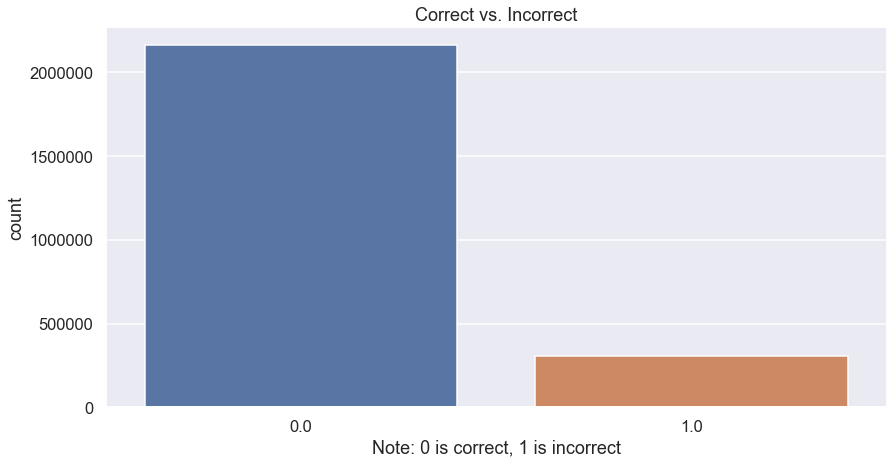

<Figure size 432x288 with 0 Axes>

In [786]:
labels = ["Correct", "Incorrect"]
sns.set(style="darkgrid")
sns.set_context("talk")
plt.subplots(figsize = (14,7))
sns.countplot(y)
plt.title("Correct vs. Incorrect")
plt.xlabel("Note: 0 is correct, 1 is incorrect")
plt.show()
plt.savefig("correct_vs_incorrect.png")

In [677]:
244730/1731506

0.1414287126873775

In [731]:
ss = StandardScaler()

# Fit on training set only.
ss.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [698]:
pca = PCA(.85)
pca.fit(X_train)
pca.n_components_

36

In [691]:
X_train

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [722]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [700]:
def log_scores(X_train, X_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    prediction_probs = lr.predict_proba(X_test)[:,1]
    
    print(f"Precision: {precision_score(pred_test, y_test)}")
    print(f"Recall: {recall_score(pred_test, y_test)}")
    print(f"Accuracy: {accuracy_score(pred_test, y_test)}")
    print(f"F1: {f1_score(pred_test, y_test)}")
    
    roc_auc = roc_auc_score(y_test, prediction_probs)
    
    print(f'roc_auc {roc_auc}')
    
    return [pred_test, prediction_probs]


log_scores(X_train, X_test, y_train, y_test)

Precision: 0.0011083583257269526
Recall: 0.2821576763485477
Accuracy: 0.8756082257215723
F1: 0.002208043121783319
roc_auc 0.6527656472638469


[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.16875341, 0.09802748, 0.07226796, ..., 0.14188031, 0.10974825,
        0.10116574])]

In [738]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
# pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
# prediction_probs = lr.predict_proba(X_test)[:,1]

# print(f"Precision: {precision_score(pred_test, y_test)}")
# print(f"Recall: {recall_score(pred_test, y_test)}")
# print(f"Accuracy: {accuracy_score(pred_test, y_test)}")
# print(f"F1: {f1_score(pred_test, y_test)}")

# roc_auc = roc_auc_score(y_test, prediction_probs)

# print(f'roc_auc {roc_auc}')

# return [pred_test, prediction_probs]

In [714]:
stk = StratifiedKFold()
stk_indices = stk.split(X_train, y_train)

In [715]:
stk_indices = list(stk_indices)

In [712]:
def fit_model_and_print_metrics(skf_splits,X_not_val, y_not_val, classifier, print_metrics = False):
    clf = classifier
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    roc_auc_list = []
    
    metric_list = [accuracy_list, precision_list, recall_list,
                    f1_list, roc_auc_list]
    
    for train_ind, test_ind in skf_splits:
        X_train = X_not_val.iloc[train_ind]
        X_test = X_not_val.iloc[test_ind]

        y_train = y_not_val.iloc[train_ind]
        y_test = y_not_val.iloc[test_ind]

        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_proba = clf.predict_proba(X_test)[:, 1]

        accuracy_list.append(accuracy_score(y_test, y_hat))
        precision_list.append(precision_score(y_test, y_hat))
        recall_list.append(recall_score(y_test, y_hat))
        f1_list.append(f1_score(y_test, y_hat))
        roc_auc_list.append(roc_auc_score(y_test, y_hat))
    
    
    mean_metrics = [sum(metric)/len(metric) for metric in metric_list]
    mean_metrics_dict = {}
    #Create a metric dictionary for ease of access.
    metric_names = ['accuracy', 'precision', 'recall',
                    'f1', 'roc_auc']
    
    for mean_metric, metric in zip(mean_metrics, metric_names):
        mean_metrics_dict[metric] = mean_metric
    
    if print_metrics == True:
        print(f"accuracy_score: {mean_metrics[0]}")
        print(f"precision_score: {mean_metrics[1]}")
        print(f"recall_score: {mean_metrics[2]}")
        print(f"f1_score: {mean_metrics[3]}")
        print(f"roc_auc_score: {mean_metrics[4]}")
        
        
    with open('best_estimators.txt', 'a') as write_file:
        write_file.write(f'''{str(clf).replace(",", "")},{mean_metrics[0]},{mean_metrics[1]},{mean_metrics[2]},{mean_metrics[3]},{mean_metrics[4]}\n''')
    return mean_metrics_dict

In [734]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

fit_model_and_print_metrics(stk_indices, X_train, y_train, dt, print_metrics = True)

accuracy_score: 0.8786475906664876
precision_score: 0.865680642173669
recall_score: 0.023744533842534055
f1_score: 0.04622109675838323
roc_auc_score: 0.5116118000286923


{'accuracy': 0.8786475906664876,
 'precision': 0.865680642173669,
 'recall': 0.023744533842534055,
 'f1': 0.04622109675838323,
 'roc_auc': 0.5116118000286923}

In [718]:
stk_indices[0]

(array([ 656808,  656825,  656826, ..., 1976233, 1976234, 1976235]),
 array([     0,      1,      2, ..., 658994, 658995, 658996]))

[[432542    166]
 [ 61260     92]]


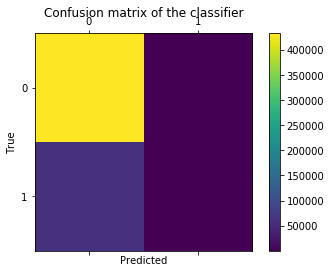

In [739]:
labels = [0, 1]
cm = confusion_matrix(y_test, pred_test, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [742]:
clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(clf, X, y, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_dt_cv_score * 100))

Mean Cross Validation Score: 79.84%


In [750]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

dt_grid_search = GridSearchCV(clf, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X, y)

KeyboardInterrupt: 

In [749]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X, y)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 90.7%
Mean Testing Score: 87.86%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

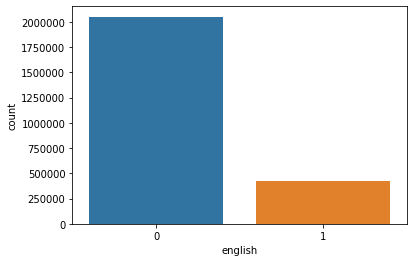

In [752]:
sns.countplot(df_en_es.english)